In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [81]:
plt.style.use('default')
COLOR = 'blue'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

In [3]:
df = pd.read_csv('StudentsPerformance.csv')

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [8]:
name = {'race/ethnicity' : 'group', 'parental level of education': 'P_edu', 
        'test preparation course' : 'test', 'math score': 'math', 'reading score' : 'reading',
        'writing score': 'writing'}

In [15]:
df = df.rename(columns=name)

In [17]:
df.head()

,gender,group,P_edu,lunch,test,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


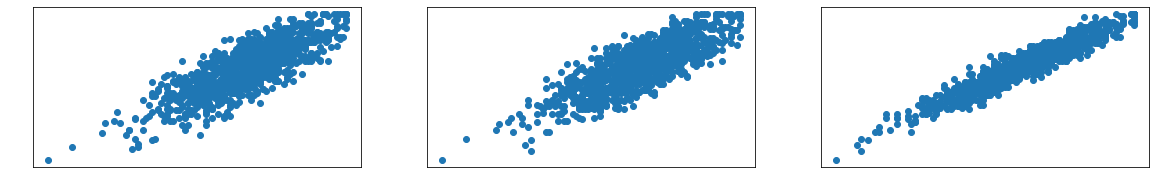

In [36]:
%matplotlib inline
plt.figure(figsize=(20, 10))
plt.subplot(3,3,1)
plt.scatter(df['math'], df['reading'])
plt.subplot(3,3,2)
plt.scatter(df['math'], df['writing'])
plt.subplot(3,3,3)
plt.scatter(df['reading'], df['writing'])

In [39]:
df_marks = df[['math', 'reading', 'writing']]

<AxesSubplot: >

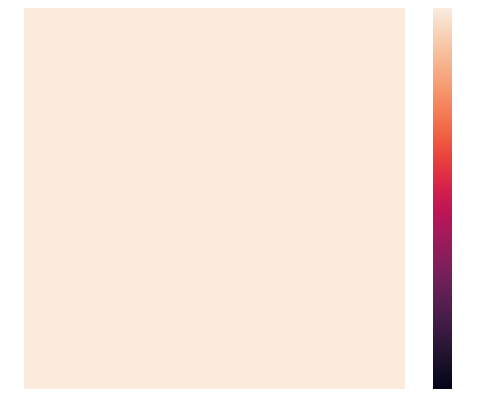

In [44]:
corr_matrix = df_marks.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, vmax=.5, square=True)

In [47]:
sum = df_marks.sum(axis=1)

In [59]:
df['GPA'] = np.round(sum / 300 * 5)

In [61]:
df['GPA'].value_counts()

3.0    432
4.0    409
2.0    100
5.0     50
1.0      8
0.0      1
Name: GPA, dtype: int64

In [62]:
df.columns

Index(['gender', 'group', 'P_edu', 'lunch', 'test', 'math', 'reading',
       'writing', 'GPA'],
      dtype='object')

In [65]:
df = df.drop(['math', 'reading', 'writing'], axis=1)

In [69]:
plt.figure(figsize=(20, 10))

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [74]:
df.columns

Index(['gender', 'group', 'P_edu', 'lunch', 'test', 'GPA'], dtype='object')

<AxesSubplot: xlabel='GPA', ylabel='count'>

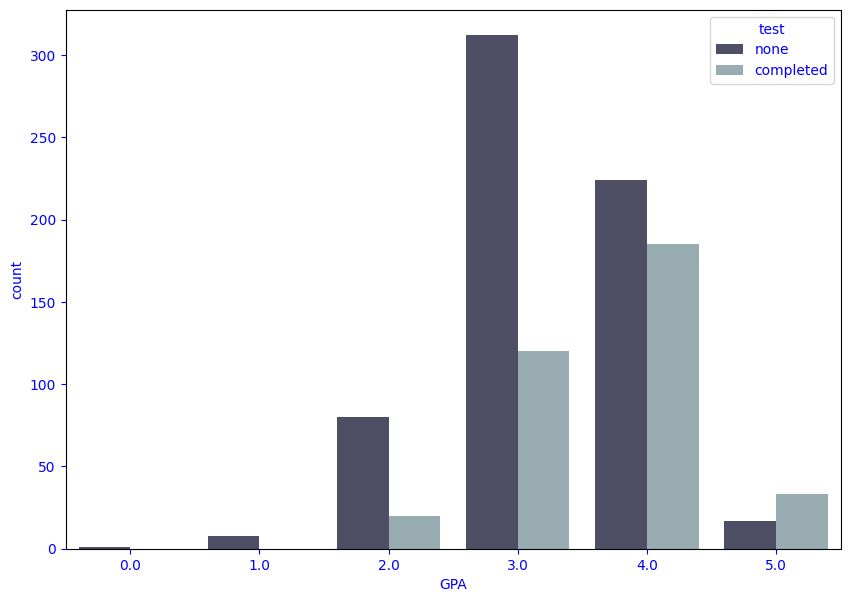

In [82]:
plt.figure(figsize=(10, 7))
sns.countplot(x=df['GPA'], hue=df['test'], palette="bone")

In [106]:
pd.pivot_table(df, values='lunch', index='test', columns='GPA', aggfunc='count')

GPA,0.0,1.0,2.0,3.0,4.0,5.0
test,,,,,,
completed,NaN,NaN,20.0,120.0,185.0,33.0
none,1.0,8.0,80.0,312.0,224.0,17.0


In [97]:
exam_completed = (df['test'] == 'completed').sum()
not_completed = df['test'].count() - exam_completed

In [96]:
print(exam_completed)

358

In [ ]:
labels = df["Education"].value_counts().index
sizes = df["Education"].value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

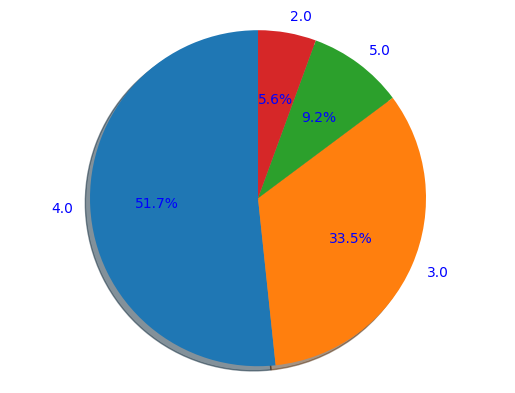

In [119]:
labels = ['4.0', '3.0', '5.0', '2.0']
sizes= df[df['test']=='completed']['GPA'].value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show() 

In [116]:
df[df['test']=='completed']['GPA'].value_counts()

4.0    185
3.0    120
5.0     33
2.0     20
Name: GPA, dtype: int64

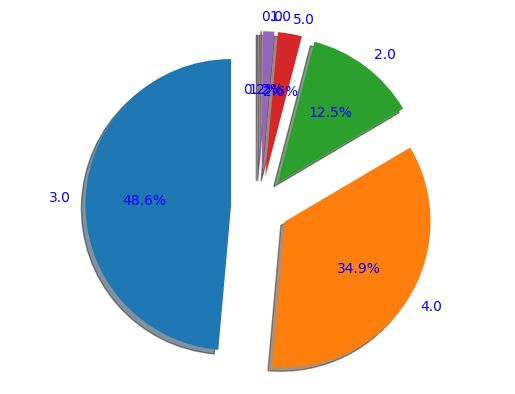

In [133]:
labels = ['3.0', '4.0', '2.0', '5.0', '1.0', '0.0']
sizes= df[~(df['test']=='completed')]['GPA'].value_counts()
explode = (0.2, 0.2, 0.2, 0.2, 0.2, 0.2)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels,autopct='%1.1f%%', explode=explode,
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show() 

In [121]:
df[~(df['test']=='completed')]['GPA'].value_counts()

3.0    312
4.0    224
2.0     80
5.0     17
1.0      8
0.0      1
Name: GPA, dtype: int64